In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series=[2.85,2.6,2.3,2.15,1.95,1.65,1.35,1.2,1.15,1,0.8,1.2,1.2,0.6,0.2,1.5,0.35,0.75,1.6]
index=pd.date_range('2001-04-18', periods=19, freq='Y')
data=pd.DataFrame(series, index=index)
data.columns=['Osinko']
#Otimme tarkkailuun Sampo pankin osingon maksun.

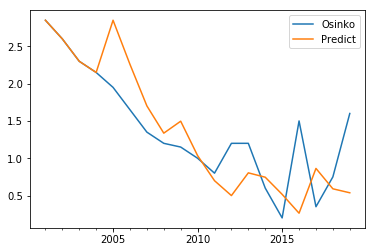

In [3]:
fit1=ExponentialSmoothing(data['Osinko'], seasonal_periods=4, trend='add', seasonal='mul').fit()
data['Predict']=fit1.fittedvalues 
data.plot()
#Ennuste on seurannut lähelle todellista osinkoa, poikkeuksena on vuosien 2005, 2016 ja 2019 isommat virheet.

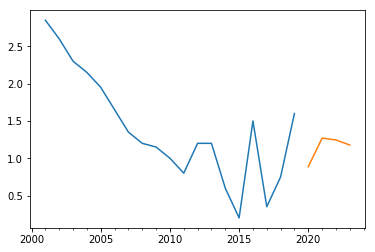

In [4]:
index=pd.date_range('2020-04-18', periods=4, freq='Y')
datap=pd.DataFrame(fit1.forecast(4), index=index)
datap.columns=['Predict']
data['Osinko'].plot()
datap['Predict'].plot()
#Tässä ennustimme osinkoa 4 vuotta eteenpäin